<a href="https://colab.research.google.com/github/databyhuseyn/DataAnalysis/blob/main/Introduction_to_Computer_Vision_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('/content/pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2024-04-28 20:45:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 2607:f8b0:4023:c0b::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   116MB/s    in 0.9s    

2024-04-28 20:45:26 (116 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/pizza.
There are 0 directories and 250 images in pizza_steak/test/steak.
There are 2 directories and 0 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/pizza.
There are 0 directories and 750 images in pizza_steak/train/steak.


In [6]:
for i in os.walk('pizza_steak'):
  print(i)

('pizza_steak', ['test', 'train'], [])
('pizza_steak/test', ['pizza', 'steak'], [])
('pizza_steak/test/pizza', [], ['2583389.jpg', '3486640.jpg', '1226346.jpg', '65128.jpg', '3581181.jpg', '1119571.jpg', '346091.jpg', '1506213.jpg', '1503858.jpg', '194643.jpg', '1594097.jpg', '2003290.jpg', '2203687.jpg', '2870405.jpg', '195160.jpg', '1962101.jpg', '2296393.jpg', '242976.jpg', '2392727.jpg', '420409.jpg', '321526.jpg', '344397.jpg', '300157.jpg', '3650727.jpg', '341377.jpg', '998005.jpg', '3612981.jpg', '678708.jpg', '2549661.jpg', '1228171.jpg', '556507.jpg', '2871261.jpg', '540882.jpg', '2343304.jpg', '1686938.jpg', '2157510.jpg', '3586083.jpg', '2880804.jpg', '1459760.jpg', '2605853.jpg', '2944567.jpg', '1342321.jpg', '103708.jpg', '1220156.jpg', '1180273.jpg', '729262.jpg', '99604.jpg', '418251.jpg', '666569.jpg', '3456604.jpg', '138961.jpg', '40449.jpg', '3375083.jpg', '3376617.jpg', '1445608.jpg', '395662.jpg', '3475871.jpg', '1202689.jpg', '3770514.jpg', '144631.jpg', '2841536.j

In [7]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [8]:
os.listdir('pizza_steak/train')

['pizza', 'steak']

In [9]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
data_dir

PosixPath('pizza_steak/train')

In [10]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class # 'pizza_steak/test/pizza'
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (512, 382, 3)


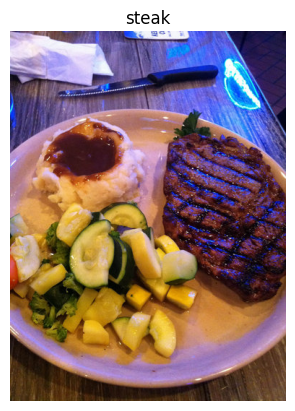

In [12]:
img = view_random_image(target_dir='pizza_steak/train/',
                  target_class = 'steak')

In [13]:
img/255

array([[[0.58823529, 0.50196078, 0.64313725],
        [0.53333333, 0.45490196, 0.59215686],
        [0.44705882, 0.36862745, 0.51372549],
        ...,
        [0.03921569, 0.03137255, 0.17647059],
        [0.01176471, 0.00784314, 0.12941176],
        [0.01176471, 0.01176471, 0.12156863]],

       [[0.7372549 , 0.65882353, 0.79607843],
        [0.73333333, 0.65490196, 0.79215686],
        [0.71764706, 0.63921569, 0.78431373],
        ...,
        [0.03921569, 0.02352941, 0.16078431],
        [0.01960784, 0.00784314, 0.12941176],
        [0.02745098, 0.01568627, 0.12941176]],

       [[0.7372549 , 0.65882353, 0.79607843],
        [0.75294118, 0.6745098 , 0.81960784],
        [0.76862745, 0.68627451, 0.83921569],
        ...,
        [0.02745098, 0.01568627, 0.1372549 ],
        [0.01960784, 0.00784314, 0.12156863],
        [0.03529412, 0.02352941, 0.1372549 ]],

       ...,

       [[0.21960784, 0.19215686, 0.09019608],
        [0.18431373, 0.14509804, 0.04705882],
        [0.21176471, 0

# Fitting Model

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)


train_dir = '/content/pizza_steak/train'
valid_dir = '/content/pizza_steak/test'

In [15]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),            # all pictures should be 224*244 pixels
                                               class_mode = 'binary',
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               batch_size=32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed=42)


model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation='relu',
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss='binary_crossentropy',
               optimizer=optimizer,
               metrics=['accuracy'])

In [17]:
history = model_1.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 33s 379ms/step - loss: 0.6393 - accuracy: 0.6460 - val_loss: 0.4567 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 11s 239ms/step - loss: 0.4717 - accuracy: 0.7907 - val_loss: 0.4028 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4478 - accuracy: 0.8020 - val_loss: 0.3689 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 6s 136ms/step - loss: 0.4097 - accuracy: 0.8200 - val_loss: 0.3862 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 8s 178ms/step - loss: 0.3640 - accuracy: 0.8473 - val_loss: 0.3757 - val_accuracy: 0.8240


In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [19]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model_2.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [20]:
history_2 = model_2.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 166ms/step - loss: 0.7084 - accuracy: 0.5047 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 108ms/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 126ms/step - loss: 0.6927 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6927 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6927 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000


In [21]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_3.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics='accuracy')

In [22]:
history_3 = model_3.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 170ms/step - loss: 5.7415 - accuracy: 0.6847 - val_loss: 0.7494 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 7s 160ms/step - loss: 2.1261 - accuracy: 0.6307 - val_loss: 2.9251 - val_accuracy: 0.6300
Epoch 3/5
47/47 [==============================] - 7s 158ms/step - loss: 1.0477 - accuracy: 0.7427 - val_loss: 0.6590 - val_accuracy: 0.7060
Epoch 4/5
47/47 [==============================] - 6s 124ms/step - loss: 0.5748 - accuracy: 0.7733 - val_loss: 0.7714 - val_accuracy: 0.7340
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.5599 - accuracy: 0.7673 - val_loss: 0.4438 - val_accuracy: 0.7920


In [23]:
len(train_data)

47

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


array([[[185, 186, 144],
        [181, 182, 140],
        [182, 183, 143],
        ...,
        [ 50,  35,  12],
        [ 48,  33,  10],
        [ 44,  29,   6]],

       [[185, 186, 144],
        [183, 184, 144],
        [184, 185, 145],
        ...,
        [ 52,  37,  14],
        [ 48,  33,  10],
        [ 45,  30,   7]],

       [[182, 183, 143],
        [182, 183, 143],
        [185, 185, 147],
        ...,
        [ 50,  35,  14],
        [ 47,  32,  11],
        [ 44,  29,   8]],

       ...,

       [[156, 162, 134],
        [155, 161, 133],
        [155, 161, 135],
        ...,
        [ 58,  37,  16],
        [ 56,  36,  12],
        [ 55,  35,  11]],

       [[167, 173, 145],
        [162, 168, 140],
        [154, 160, 134],
        ...,
        [ 55,  37,  13],
        [ 54,  36,  12],
        [ 54,  36,  12]],

       [[174, 180, 152],
        [179, 185, 157],
        [178, 184, 158],
        ...,
        [ 52,  34,  10],
        [ 52,  34,  10],
        [ 54,  36,  12]]], dtype=uint8)
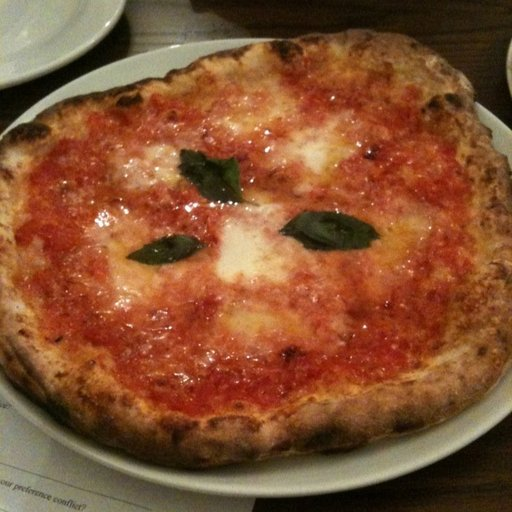

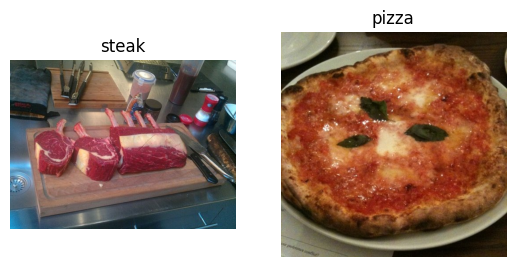

In [24]:
plt.figure()
plt.subplot(1, 2, 1)
view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
view_random_image('pizza_steak/train/', 'pizza')

In [25]:
!nvidia-smi

Sun Apr 28 20:48:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0              31W /  70W |   1665MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(1./ 255)
test_datagen = ImageDataGenerator(1./ 255)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode='binary')

test_data = test_datagen.flow_from_directory(directory=valid_dir,
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode = 'binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
images, labels = train_data.next()

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [29]:
tf.keras.backend.clear_session()

In [30]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           padding='valid',
           activation='relu',
           input_shape=(224,224, 3)),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu'),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu'),
    MaxPool2D(2),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation='sigmoid')

])

In [31]:
optimizer=Adam(learning_rate=1e-3)
model_4.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics='accuracy')

In [32]:
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 217ms/step - loss: 3.0526 - accuracy: 0.4973 - val_loss: 0.6930 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.8902 - accuracy: 0.5260 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 167ms/step - loss: 0.7467 - accuracy: 0.5473 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 143ms/step - loss: 0.6988 - accuracy: 0.5793 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 144ms/step - loss: 0.6797 - accuracy: 0.6000 - val_loss: 0.6933 - val_accuracy: 0.5000


In [33]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 89ms/step - loss: 86.9403 - accuracy: 0.7560


[86.94031524658203, 0.7559999823570251]

In [34]:
model_4.evaluate(test_data)

16/16 [==============================] - 1s 78ms/step - loss: 0.6953 - accuracy: 0.5820


[0.6953215599060059, 0.5820000171661377]

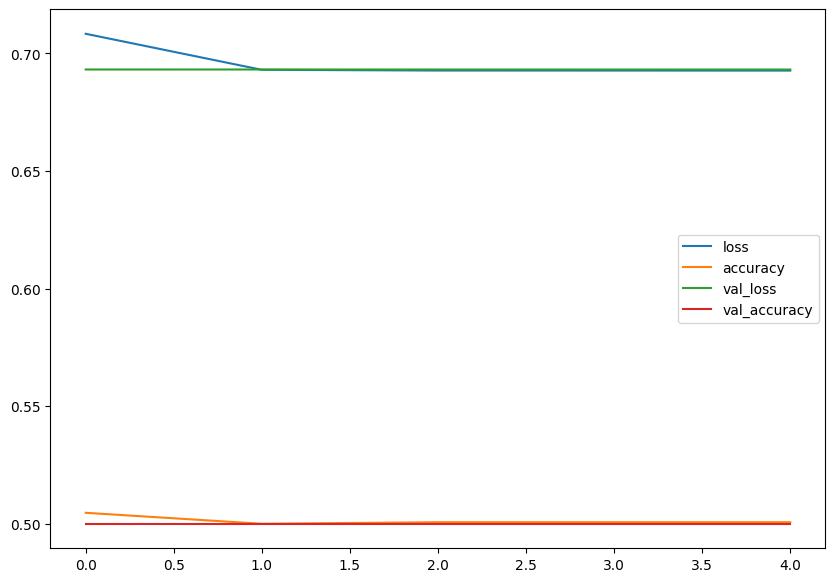

In [35]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 7));

In [36]:
history_4.history

{'loss': [3.0526273250579834,
  0.8901975154876709,
  0.746697187423706,
  0.6987727284431458,
  0.6796635985374451],
 'accuracy': [0.4973333477973938,
  0.5260000228881836,
  0.5473333597183228,
  0.5793333053588867,
  0.6000000238418579],
 'val_loss': [0.6929730176925659,
  0.6930838823318481,
  0.6931194067001343,
  0.6931630969047546,
  0.6932634115219116],
 'val_accuracy': [0.5019999742507935, 0.5, 0.5, 0.5, 0.5]}

In [37]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))
  # Plot loss
  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'val_accuracy')
  plt.title('Accuracy')
  plt.xlabel("Epochs")
  plt.legend()

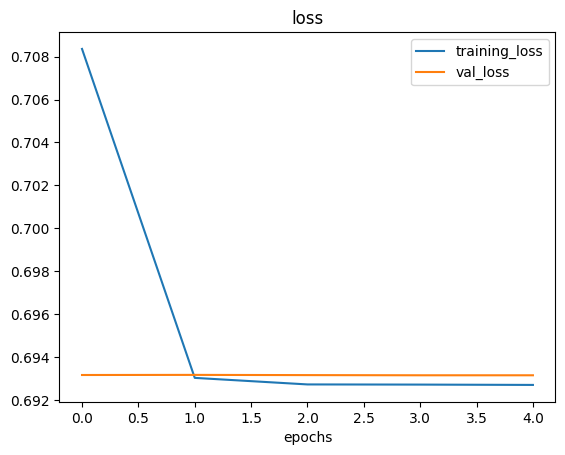

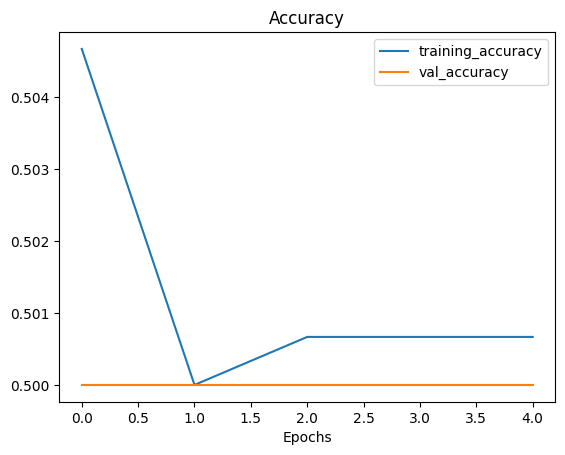

In [38]:
plot_loss_curves(history)

# Data Augmentation

In [39]:
# Augmented Dataset
train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                             rotation_range = 0.2,
                                             shear_range =0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True,
                                             vertical_flip=True)
# Normal Dataset
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [40]:
print('Train data augmented: ')
train_data_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                   batch_size = 32,
                                                                   target_size=(224, 224),
                                                                   class_mode='binary',
                                                                   shuffle = False)

print('Non-Augmented train data: ')
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               shuffle=False)

IMG_SIZE = (224, 224)
print("Non-Augmented train data: ")
test_data = test_datagen.flow_from_directory(directory = valid_dir,
                                             batch_size = 32,
                                             target_size = IMG_SIZE,
                                             class_mode = 'binary')

Train data augmented: 
Found 1500 images belonging to 2 classes.
Non-Augmented train data: 
Found 1500 images belonging to 2 classes.
Non-Augmented train data: 
Found 500 images belonging to 2 classes.


In [41]:
images, labels = train_data.next()

augmented_images, augmented_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

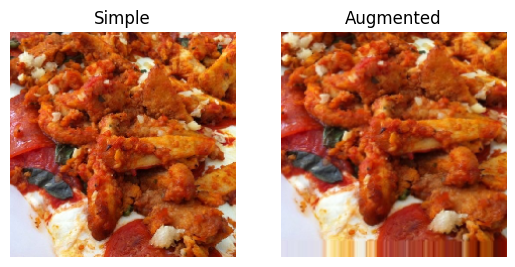

In [42]:
plt.figure()
random_number = np.random.randint(len(augmented_images))

plt.subplot(1, 2, 1)
plt.imshow(images[random_number])
plt.title('Simple')
plt.axis('Off')

plt.subplot(1, 2, 2)
plt.imshow(augmented_images[random_number])
plt.title('Augmented')
plt.axis("Off")



In [43]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=(3, 3),
                          padding='valid',
                          kernel_initializer='he_normal',
                          activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [44]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_5.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [45]:
history_5 = model_5.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 31s 616ms/step - loss: 3.0233 - accuracy: 0.4187 - val_loss: 0.6876 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 32s 686ms/step - loss: 0.6965 - accuracy: 0.5013 - val_loss: 0.6903 - val_accuracy: 0.5140
Epoch 3/5
47/47 [==============================] - 27s 585ms/step - loss: 0.6906 - accuracy: 0.5420 - val_loss: 0.6784 - val_accuracy: 0.6280
Epoch 4/5
47/47 [==============================] - 23s 498ms/step - loss: 0.6923 - accuracy: 0.5633 - val_loss: 0.6510 - val_accuracy: 0.6580
Epoch 5/5
47/47 [==============================] - 24s 510ms/step - loss: 0.6814 - accuracy: 0.5373 - val_loss: 0.6641 - val_accuracy: 0.6860


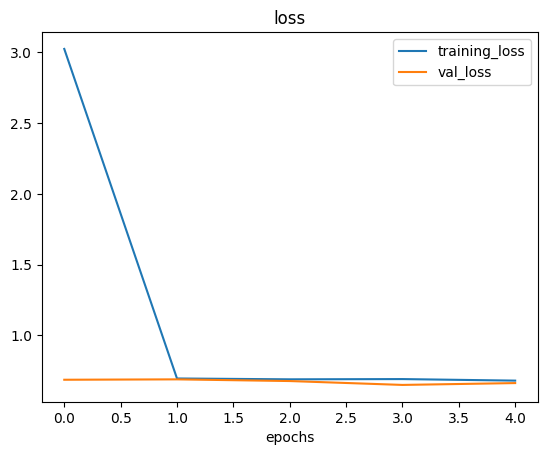

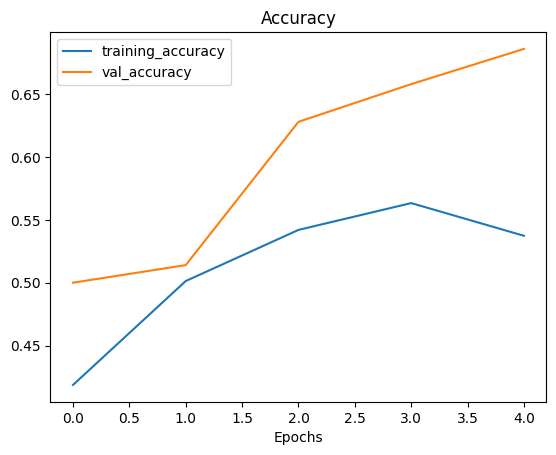

In [46]:
plot_loss_curves(history_5)

In [47]:
# Now let's Shuffle data

In [48]:
print('Augmented and Shuffled train data')
train_data_augmented_and_shuffled = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                             batch_size = 32,
                                                                             target_size = IMG_SIZE,
                                                                             class_mode = 'binary')

Augmented and Shuffled train data
Found 1500 images belonging to 2 classes.


In [49]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [50]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_6.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [51]:
history_6 = model_6.fit(train_data_augmented_and_shuffled,
            epochs = 5,
            steps_per_epoch = len(train_data_augmented_and_shuffled),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 30s 608ms/step - loss: 0.6582 - accuracy: 0.6313 - val_loss: 0.5598 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 21s 445ms/step - loss: 0.5384 - accuracy: 0.7533 - val_loss: 0.4580 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 21s 455ms/step - loss: 0.4868 - accuracy: 0.7707 - val_loss: 0.3584 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 20s 431ms/step - loss: 0.4688 - accuracy: 0.7813 - val_loss: 0.3637 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 20s 429ms/step - loss: 0.4737 - accuracy: 0.7873 - val_loss: 0.4172 - val_accuracy: 0.7960


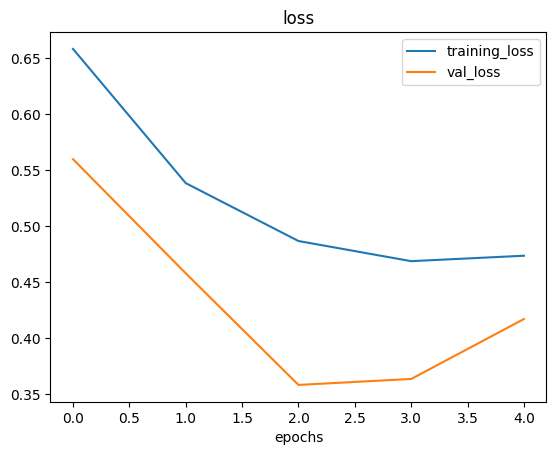

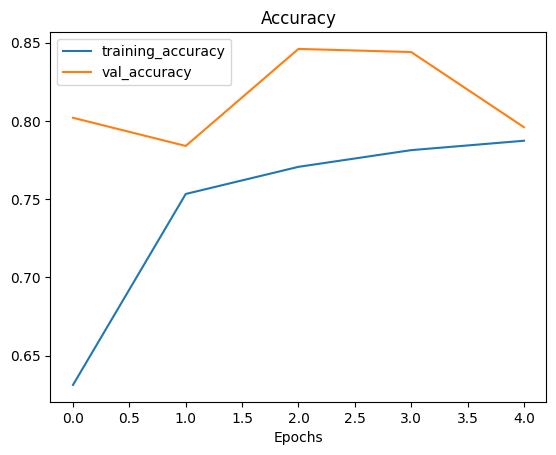

In [52]:
plot_loss_curves(history_6)

In [53]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')

--2024-04-28 20:53:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2024-04-28 20:53:40 (51.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



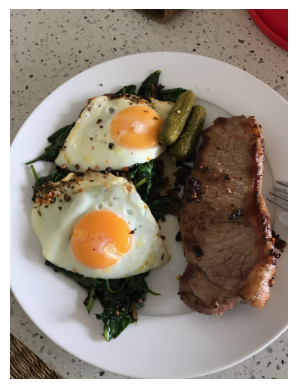

In [54]:
plt.imshow(steak)
plt.axis(False)
plt.show()

In [55]:
steak_norm = ImageDataGenerator(rescale = 1/255.)

In [56]:
steak.shape

(4032, 3024, 3)

In [57]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [58]:
(load_and_prep_image('/content/03-steak.jpeg').shape)

TensorShape([224, 224, 3])

In [59]:
steak = load_and_prep_image('03-steak.jpeg')
pred = model_6.predict(tf.expand_dims(steak, axis = 0)).round()

1/1 [==============================] - 0s 236ms/step


In [60]:
pred

array([[1.]], dtype=float32)

In [61]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [62]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [63]:
def pred_and_plot(model, filename, class_names = class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

1/1 [==============================] - 0s 17ms/step


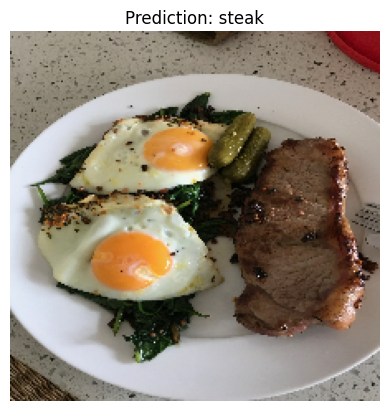

In [64]:
pred_and_plot(model_6, '03-steak.jpeg')

In [65]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pizza = mpimg.imread('03-pizza-dad.jpeg')

--2024-04-28 20:53:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2024-04-28 20:53:44 (62.2 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



1/1 [==============================] - 0s 24ms/step


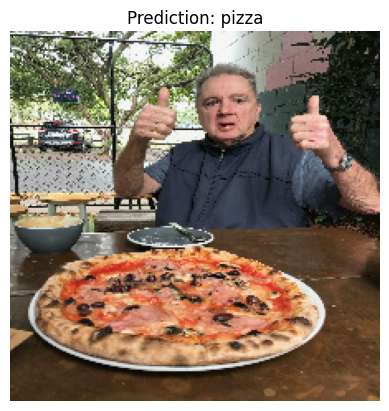

In [66]:
pred_and_plot(model_6, '/content/03-pizza-dad.jpeg')

# 10 Food Classes

In [67]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

import zipfile
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

--2024-04-28 20:53:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  56.9MB/s    in 11s     

2024-04-28 20:53:56 (43.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/test.
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream.
There are 0 directories and 250 images in 10_food_classes_all_dat

In [68]:
train_dir = '/content/10_food_classes_all_data/train/'
test_dir = '/content/10_food_classes_all_data/test/'

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmentation = ImageDataGenerator(rescale=1/255.,
                                                rotation_range=0.2,
                                                width_shift_range=0.2,
                                                height_shift_range=0.2,
                                                shear_range=0.2,
                                                zoom_range=0.2,
                                                horizontal_flip=True,
                                                vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [70]:
IMG_SIZE=(224, 224)
batch_size=32

In [71]:
augmented_train = train_datagen_augmentation.flow_from_directory(directory = train_dir,
                                                                 target_size=IMG_SIZE,
                                                                 class_mode='categorical',
                                                                 batch_size=batch_size)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=IMG_SIZE,
                                             class_mode='categorical',
                                             batch_size=batch_size)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [72]:
images, labels = augmented_train.next()

In [73]:
images.shape

(32, 224, 224, 3)

In [74]:
labels.shape

(32, 10)

(-0.5, 223.5, 223.5, -0.5)

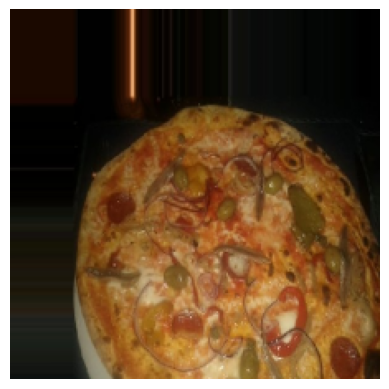

In [75]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(images[np.random.randint(len(images))])
plt.axis(False)

In [76]:
import tensorflow as tf

model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    # tf.keras.layers.Conv2D(filters=10,
    #                        kernel_size=(3, 3),
    #                        padding='valid',
    #                        activation='relu',
    #                        kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [77]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_7.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics='accuracy')

In [78]:
images.shape

(32, 224, 224, 3)

In [79]:
tf.expand_dims(labels, axis=0)

<tf.Tensor: shape=(1, 32, 10), dtype=float32, numpy=
array([[[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.

In [80]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('MyCheckpoint',
                                                   save_weights_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)

In [81]:
history_7 = model_7.fit(augmented_train, epochs=5,
                        steps_per_epoch=len(augmented_train),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=(checkpoint_cb, early_stopping_cb))

Epoch 1/5
235/235 [==============================] - 107s 447ms/step - loss: 2.1471 - accuracy: 0.2396 - val_loss: 1.9825 - val_accuracy: 0.2840
Epoch 2/5
235/235 [==============================] - 103s 439ms/step - loss: 2.0098 - accuracy: 0.2928 - val_loss: 1.8424 - val_accuracy: 0.3560
Epoch 3/5
235/235 [==============================] - 104s 441ms/step - loss: 1.9463 - accuracy: 0.3243 - val_loss: 1.8167 - val_accuracy: 0.3744
Epoch 4/5
235/235 [==============================] - 114s 485ms/step - loss: 1.9069 - accuracy: 0.3504 - val_loss: 1.7714 - val_accuracy: 0.4124
Epoch 5/5
235/235 [==============================] - 108s 460ms/step - loss: 1.8756 - accuracy: 0.3663 - val_loss: 1.9938 - val_accuracy: 0.3412


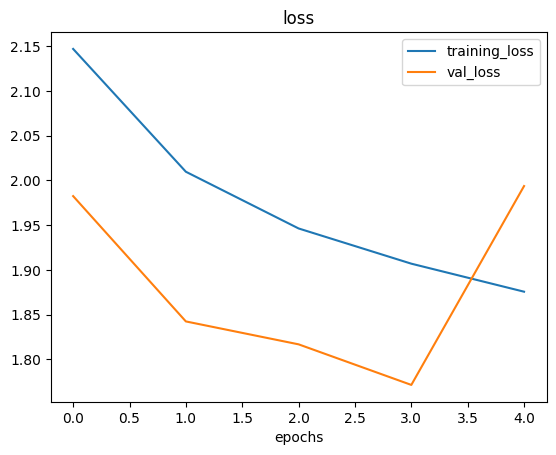

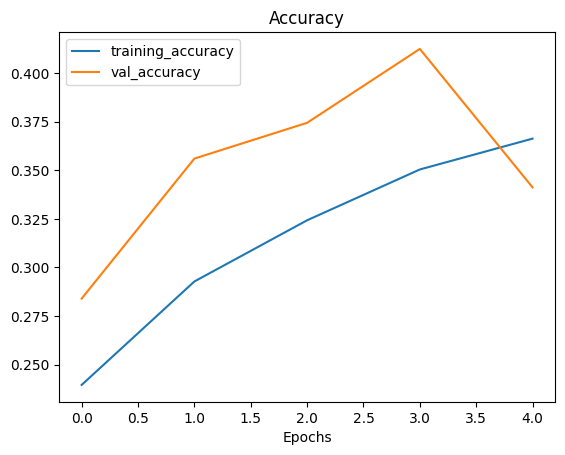

In [82]:
plot_loss_curves(history_7)

In [83]:
!wget https://thekittchen.com/wp-content/uploads/2016/04/PRE-Brand-Steak-and-Blue-Cheese-Pizza-2.jpg

--2024-04-28 21:04:13--  https://thekittchen.com/wp-content/uploads/2016/04/PRE-Brand-Steak-and-Blue-Cheese-Pizza-2.jpg
Resolving thekittchen.com (thekittchen.com)... 165.227.5.246
Connecting to thekittchen.com (thekittchen.com)|165.227.5.246|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383815 (375K) [image/jpeg]
Saving to: ‘PRE-Brand-Steak-and-Blue-Cheese-Pizza-2.jpg’

PRE-Brand-Steak-and 100%[===================>] 374.82K  --.-KB/s    in 0.07s   

2024-04-28 21:04:13 (5.57 MB/s) - ‘PRE-Brand-Steak-and-Blue-Cheese-Pizza-2.jpg’ saved [383815/383815]



1/1 [==============================] - 0s 17ms/step


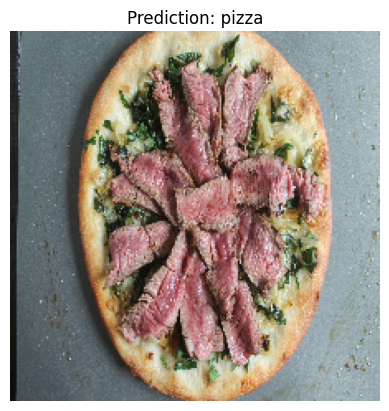

In [86]:
pred_and_plot(model_7, '/content/PRE-Brand-Steak-and-Blue-Cheese-Pizza-2.jpg')

# Another Version of 10 Food classes

In [87]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape: (512, 511, 3)


array([[[231, 255, 255],
        [227, 253, 254],
        [219, 247, 251],
        ...,
        [ 97,  78,  63],
        [ 97,  78,  63],
        [ 97,  78,  61]],

       [[230, 255, 255],
        [227, 253, 254],
        [220, 248, 252],
        ...,
        [ 97,  78,  63],
        [ 97,  78,  61],
        [ 97,  78,  61]],

       [[229, 254, 255],
        [227, 252, 255],
        [221, 246, 253],
        ...,
        [ 96,  77,  62],
        [ 96,  77,  60],
        [ 96,  77,  60]],

       ...,

       [[ 27,  22,  28],
        [ 27,  22,  28],
        [ 26,  21,  27],
        ...,
        [  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6]],

       [[ 28,  23,  29],
        [ 28,  23,  29],
        [ 27,  22,  28],
        ...,
        [  5,   5,   7],
        [  5,   5,   7],
        [  5,   5,   7]],

       [[ 30,  25,  31],
        [ 30,  25,  31],
        [ 29,  24,  30],
        ...,
        [  6,   6,   8],
        [  6,   6,   8],
        [  6,   6,   8]]], dtype=uint8)
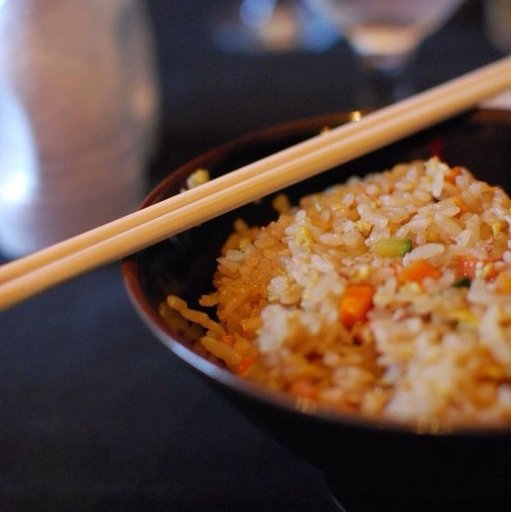

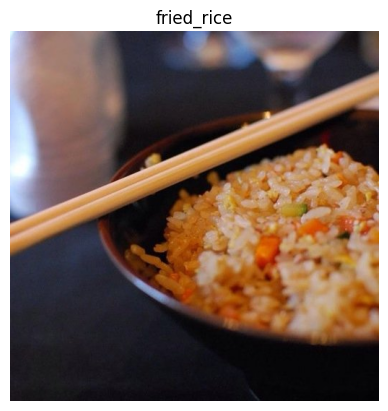

In [88]:
import random
view_random_image(target_dir = train_dir, target_class = random.choice(class_names))

In [89]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = test_datagen.flow_from_directory(train_dir,
                                              target_size = (224, 224),
                                              batch_size=32)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [90]:
model_1_categorical = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [91]:
optimizer =  tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1_categorical.compile(loss='categorical_crossentropy',
                            optimizer=optimizer,
                            metrics='accuracy')

In [92]:
model_1_categorical.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 32s 129ms/step - loss: 2.3599 - accuracy: 0.1633 - val_loss: 2.2723 - val_accuracy: 0.1944
Epoch 2/5
235/235 [==============================] - 35s 148ms/step - loss: 1.8878 - accuracy: 0.3487 - val_loss: 2.0738 - val_accuracy: 0.2484
Epoch 3/5
235/235 [==============================] - 29s 125ms/step - loss: 1.4034 - accuracy: 0.5364 - val_loss: 2.0827 - val_accuracy: 0.2936
Epoch 4/5
235/235 [==============================] - 30s 128ms/step - loss: 0.8201 - accuracy: 0.7345 - val_loss: 2.5001 - val_accuracy: 0.2772
Epoch 5/5
235/235 [==============================] - 29s 125ms/step - loss: 0.3629 - accuracy: 0.8945 - val_loss: 3.4305 - val_accuracy: 0.2576


In [128]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
cp = ModelCheckpoint('MyCheckpoint', save_weights_only=True)
es = EarlyStopping(restore_best_weights=True,
                   patience=1,
                   monitor='loss',
                   #mode = 'min'
                   )

In [129]:
model_1_categorical_history = model_1_categorical.fit(train_data,
                                                      epochs=5,
                                                      steps_per_epoch=len(train_data),
                                                      validation_steps=len(test_data),
                                                      callbacks=[es, cp])

Epoch 1/5
235/235 [==============================] - 24s 104ms/step - loss: 0.0261 - accuracy: 0.9923
Epoch 2/5
235/235 [==============================] - 23s 97ms/step - loss: 0.0293 - accuracy: 0.9920


In [133]:
model_1_categorical_history.history

{'loss': [0.026091791689395905, 0.02931360900402069],
 'accuracy': [0.9922666549682617, 0.9919999837875366]}

In [108]:
model_2_categorical = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           strides=(2, 2),
                           input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           strides=(2, 2)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           strides=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           strides=(2, 2)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [109]:
optimizer =  tf.keras.optimizers.Adam(learning_rate=1e-3)
model_2_categorical.compile(loss='categorical_crossentropy',
                            optimizer=optimizer,
                            metrics='accuracy')

In [110]:
model_2_categorical_history = model_2_categorical.fit(train_data,
                                                      epochs=5,
                                                      steps_per_epoch=len(train_data),
                                                      validation_data=test_data,
                                                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 31s 117ms/step - loss: 2.9163 - accuracy: 0.1201 - val_loss: 2.2563 - val_accuracy: 0.1596
Epoch 2/5
235/235 [==============================] - 28s 119ms/step - loss: 2.2885 - accuracy: 0.1480 - val_loss: 2.2053 - val_accuracy: 0.2044
Epoch 3/5
235/235 [==============================] - 28s 119ms/step - loss: 2.2222 - accuracy: 0.1792 - val_loss: 2.1310 - val_accuracy: 0.2460
Epoch 4/5
235/235 [==============================] - 27s 114ms/step - loss: 2.1804 - accuracy: 0.2065 - val_loss: 2.0801 - val_accuracy: 0.2740
Epoch 5/5
235/235 [==============================] - 28s 118ms/step - loss: 2.1266 - accuracy: 0.2379 - val_loss: 2.0344 - val_accuracy: 0.3048


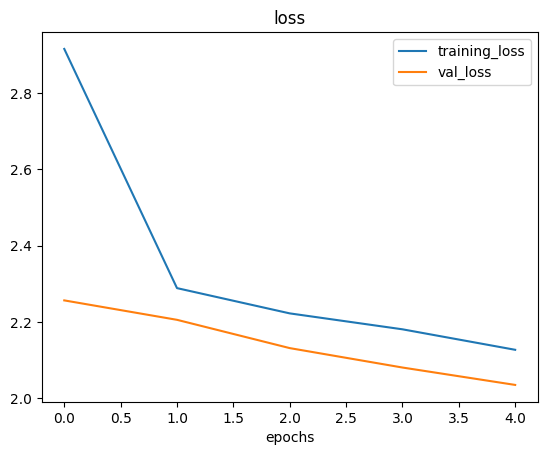

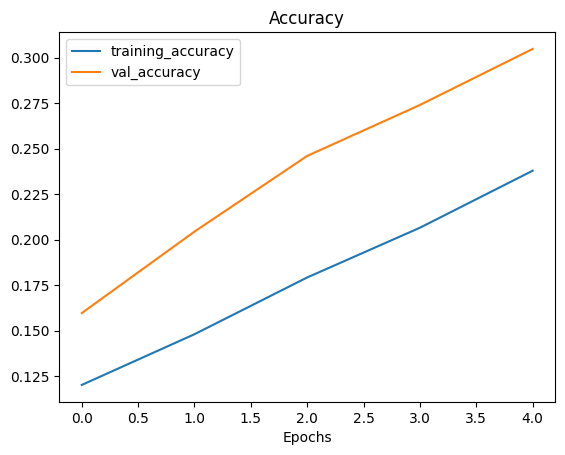

In [111]:
plot_loss_curves(model_2_categorical_history)

In [112]:
model_2_categorical.evaluate(test_data)

79/79 [==============================] - 7s 89ms/step - loss: 2.0344 - accuracy: 0.3048


[2.034398078918457, 0.30480000376701355]

In [113]:
model_2_copy = tf.keras.models.clone_model(model_2_categorical)

In [114]:
model_2_copy.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 111, 111, 10)      280       
                                                                 
 batch_normalization (Batch  (None, 111, 111, 10)      40        
 Normalization)                                                  
                                                                 
 conv2d_19 (Conv2D)          (None, 55, 55, 10)        910       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 27, 27, 10)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_1 (Bat  (None, 27, 27, 10)        40        
 chNormalization)                                                
                                                      

In [115]:
train_augmented_datagen = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True,
                                             vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [116]:
train_data_augmented = train_augmented_datagen.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode='categorical',
                                                                   batch_size=32)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode='categorical',
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [117]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_2_copy.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics='accuracy')

In [118]:
model_2_copy_history = model_2_copy.fit(train_data_augmented,
                                        epochs=5,
                                        steps_per_epoch=len(train_data_augmented),
                                        validation_data=test_data,
                                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 105s 438ms/step - loss: 2.9426 - accuracy: 0.1061 - val_loss: 2.2930 - val_accuracy: 0.1208
Epoch 2/5
235/235 [==============================] - 102s 435ms/step - loss: 2.3193 - accuracy: 0.1221 - val_loss: 2.2528 - val_accuracy: 0.1604
Epoch 3/5
235/235 [==============================] - 106s 451ms/step - loss: 2.2762 - accuracy: 0.1421 - val_loss: 2.2150 - val_accuracy: 0.1824
Epoch 4/5
235/235 [==============================] - 101s 431ms/step - loss: 2.2492 - accuracy: 0.1567 - val_loss: 2.1932 - val_accuracy: 0.2080
Epoch 5/5
235/235 [==============================] - 101s 432ms/step - loss: 2.2229 - accuracy: 0.1736 - val_loss: 2.1517 - val_accuracy: 0.2264


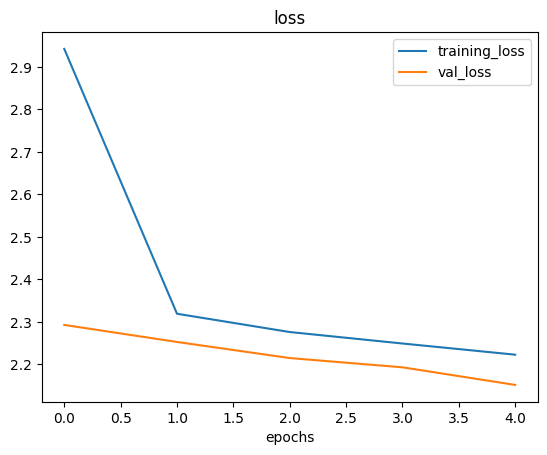

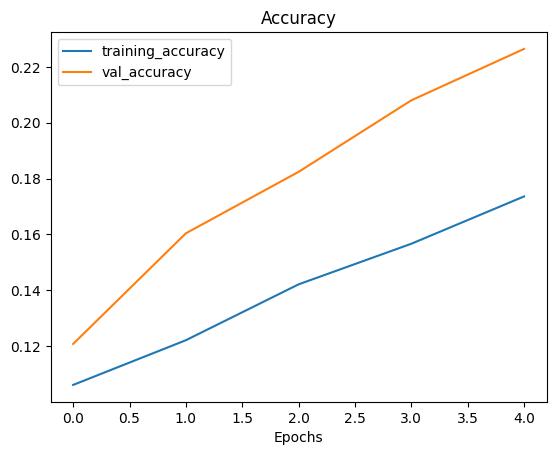

In [119]:
plot_loss_curves(model_2_copy_history)

In [120]:
# pred_and_plot for multiclass classification

def pred_and_plot(model, filename, class_names = class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis = 0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.math.argmax(pred, axis=1)]
  else:
    pred_class = class_names[tf.int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

In [121]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2024-04-28 21:33:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.05s   

2024-04-28 21:33:07 (70.6 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2024-04-28 21:33:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting res

1/1 [==============================] - 0s 235ms/step


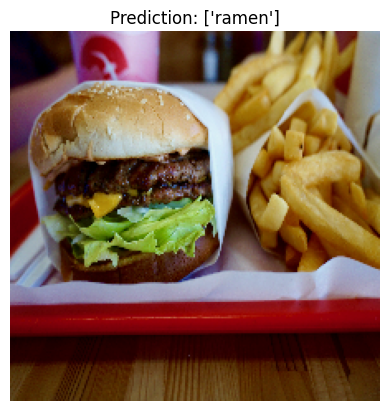

In [122]:
pred_and_plot(model = model_2_categorical,
              filename = '03-hamburger.jpeg',
              class_names = (class_names))

In [123]:
model_2_categorical.save('Categorical Model')